In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [7]:
data=pd.read_csv('Fraud_check.csv',encoding='latin1')
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


# EDA

In [8]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [9]:
df.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [11]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [12]:
df['Marital.Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [13]:
df['Urban'].unique()

array(['YES', 'NO'], dtype=object)

In [14]:
df['Undergrad'] = df['Undergrad'].map({'YES':1, 'NO':0})
df['Marital.Status'] = df['Marital.Status'].map({'Single':0, 'Divorced':2, 'Married':1})
df['Urban'] = df['Urban'].map({'YES':1, 'NO':0})

In [15]:
df.head(10)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,68833,50047,10,1
1,1,2,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,0,50190,193264,15,1
4,0,1,81002,27533,28,0
5,0,2,33329,116382,0,0
6,0,2,83357,80890,8,1
7,1,0,62774,131253,3,1
8,0,0,83519,102481,12,1
9,1,2,98152,155482,4,1


In [16]:
df['Fraud'] = np.where(df['Taxable.Income']<=30000, 1,0)
df.head(15)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud
0,0,0,68833,50047,10,1,0
1,1,2,33700,134075,18,1,0
2,0,1,36925,160205,30,1,0
3,1,0,50190,193264,15,1,0
4,0,1,81002,27533,28,0,0
5,0,2,33329,116382,0,0,0
6,0,2,83357,80890,8,1,0
7,1,0,62774,131253,3,1,0
8,0,0,83519,102481,12,1,0
9,1,2,98152,155482,4,1,0


In [17]:
colnames = list(df.columns)
colnames

['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban',
 'Fraud']

In [18]:
predictors = colnames[:-1]
target = colnames[-1]

In [19]:
print(predictors)

['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population', 'Work.Experience', 'Urban']


In [20]:
print(target)

Fraud


In [21]:
X = df[predictors]
Y = df[target]

In [22]:
X

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,0,68833,50047,10,1
1,1,2,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,0,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,2,76340,39492,7,1
596,1,2,69967,55369,2,1
597,0,2,47334,154058,0,1
598,1,1,98592,180083,17,0


In [23]:
rf = RandomForestClassifier( n_estimators=10,
    criterion='entropy',oob_score=False)

In [24]:
df.shape

(600, 7)

In [25]:
rf.fit(X,Y)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [26]:
rf.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [27]:
df['rf_pred'] = rf.predict(X)
cols = ['rf_pred','Fraud']
df[cols].head(15)

,rf_pred,Fraud
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
confusion_matrix(df['Fraud'],df['rf_pred'])

array([[476,   0],
       [  0, 124]], dtype=int64)

In [30]:
from sklearn.metrics import classification_report

print(classification_report(df['Fraud'],df['rf_pred']))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       476
           1       1.00      1.00      1.00       124

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



#### VISUALIZING THE FRAUD_CHECK

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


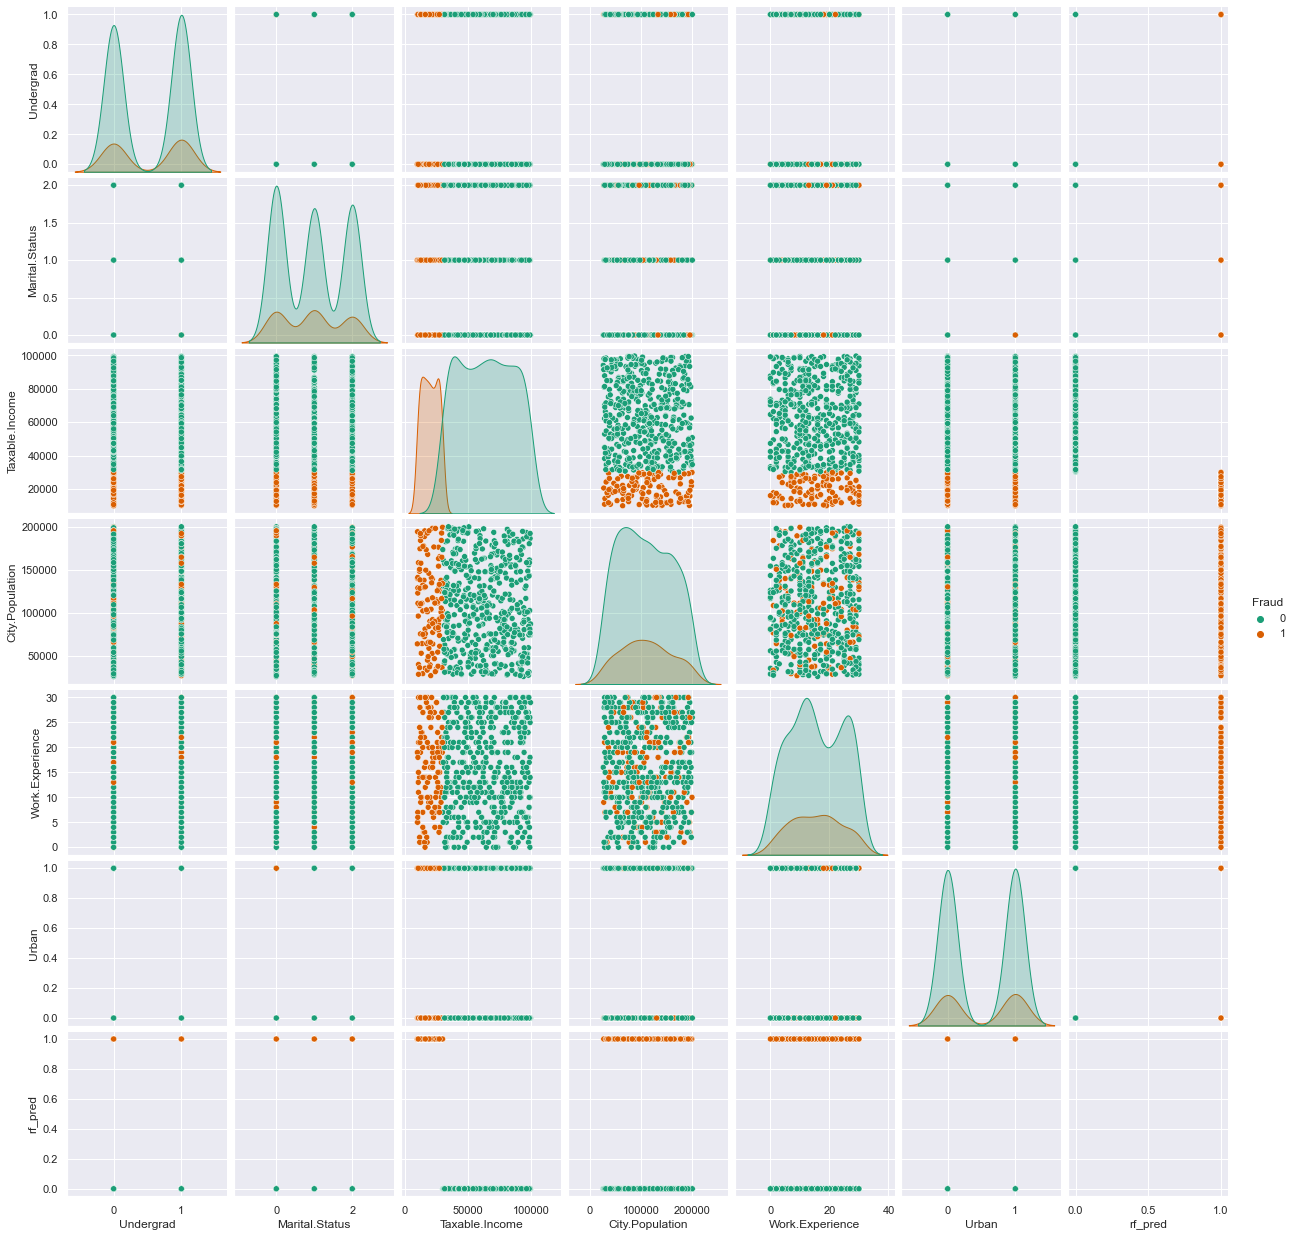

In [31]:
sns.pairplot(df,hue='Fraud',palette='Dark2')

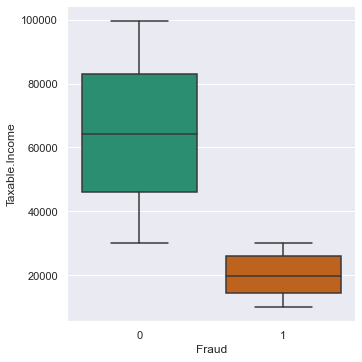

In [32]:
sns.catplot(x='Fraud',y='Taxable.Income',data=df,kind='box',palette='Dark2')

Here we can clearly see the notches of Orange & Green boxes is not overlaping this means showing strong evidence that the medians differ so Orange box is less than 30,000 which is Risky and Green box is Good.

In [33]:
pdata=df.copy()

In [34]:
pdata.head(2)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Fraud,rf_pred
0,0,0,68833,50047,10,1,0,0
1,1,2,33700,134075,18,1,0,0


In [35]:
x=pdata.iloc[:,0:-1]
y=pdata['rf_pred']

In [36]:
y.value_counts()

0    476
1    124
Name: rf_pred, dtype: int64

### Building model using Random Forest

TRAIN TEST SPLIT METHOD

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=42)

In [60]:
model.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier())

In [61]:
base_pred = model.predict(x_test)

In [62]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

In [63]:
confusion_matrix(y_test,base_pred) #This is very good. But not sure if it's an overfitted model

array([[94,  0],
       [ 0, 26]], dtype=int64)

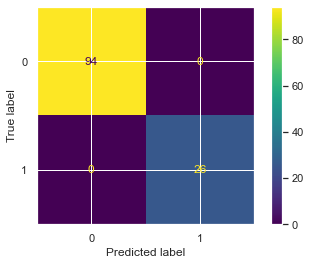

In [64]:
plot_confusion_matrix(model,x_test,y_test)

In [43]:
modelb=RandomForestClassifier()
modelb.fit(x_train,y_train)
pred=modelb.predict(x_test)
print(np.mean(y_test==pred))

1.0


KFOLD CROSS VALIDATION

In [44]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold=KFold(n_splits=10)
results=cross_val_score(modelb,x,y,cv=kfold)
print(results.mean())

1.0


BAGGING ENSEMBLED METHOD 

In [45]:
modelb1=RandomForestClassifier(n_estimators=500,criterion='entropy',max_leaf_nodes=19,max_depth=19)

In [46]:
from sklearn.ensemble import BaggingClassifier
model=BaggingClassifier(base_estimator=modelb1)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

1.0


ADABOOST METHOD

In [47]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier(base_estimator=modelb)
results=cross_val_score(model,x,y,cv=kfold)
print(results.mean())

1.0


XGBoost classifier

In [54]:
#  XGBoost model for dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [55]:
xgmodel = XGBClassifier()
xgmodel.fit(x_train, y_train)

[23:18:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\User\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [56]:
# make predictions for test data
y_pred = xgmodel.predict(x_test)
predictions = [round(value) for value in y_pred]

In [57]:
y_pred1 = xgmodel.predict(x_train)
predictions1 = [round(value) for value in y_pred1]

In [58]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 100.00%


Results:

   Here we can clearly see the notches of Orange & Green boxes is not overlaping this means showing strong evidence that      the medians differ so Orange box is less than 30,000 which is Risky and Green box is Good.
    
   Here I applied many ensemble techniques and I got the high accuracy in XGBM for making best model in the Fraud Check Dataset.